# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\WinPython-64bit-3.5.2.3Qt5\python-3.5.2.amd64\lib\site-packages\pandas\core\indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


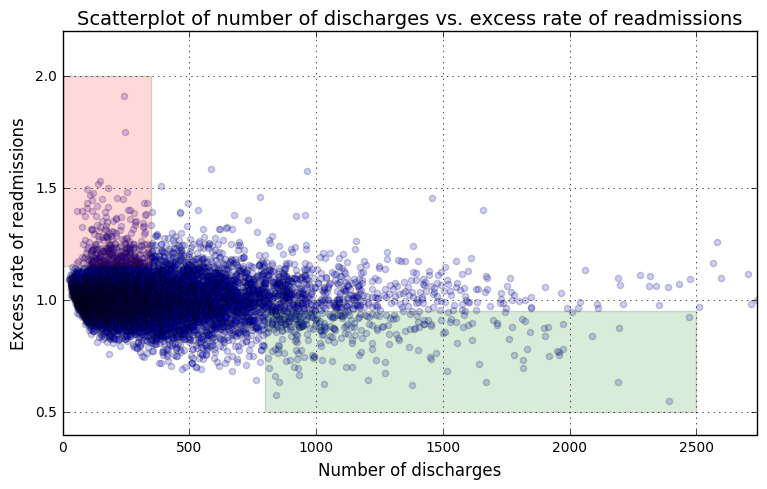

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [17]:
import seaborn as sns
from scipy.stats import norm, skew
from __future__ import print_function
sns.set_context("talk")

### A. Do you agree with the above analysis and recommendations? Why or why not?

The trend would be best determined by a linear regression. The trends at lower and higher number discharges would be best determined by looking at the skew of the distribution of the rate of readmissions, rather than the scattered tails on the scatter plot - this might give the illusion of wide tails, but these might be a very small contribution to the distribution. If these initial observations change due to different analysis techniques, then the recommendations will change.

Number of discharges is not a good proxy for hospital capacity. The number of discharges might be high because of high demand and high level of processing, not necessarily the number of beds. If there is a correlation between hospital discharges and excess readmission ratio, it looks like the slope is 0.05/1000, which is not a strong correlation. If the larger institutions have lower readmission rates, it might be because there is lower demand for beds, and therefore less need to push people out for more critical ailments. If people are able to stay longer, there might be less rate of readmission - but this has nothing to do with quality of care. An additional analysis which is outside of the scope of this project is to look at the spatial distribution of population and correlate it with the distribution of hospitals and capacity. This might give a sense of actual demand, and may indicate places where a small satellite hospital could deal with excess need in an area, as opposed to consolidation as a solution.

Btw, the data is over a three year period.

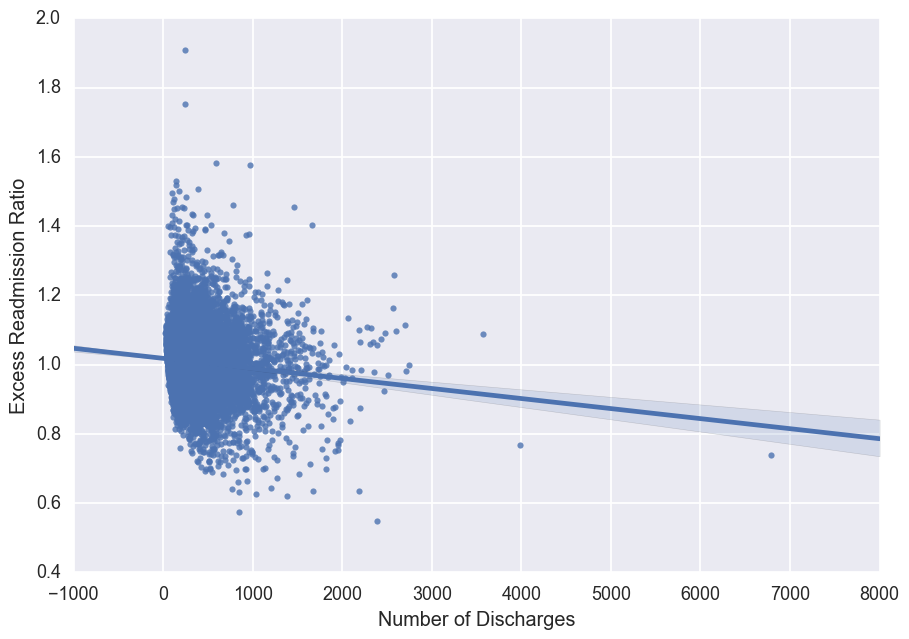

In [12]:
sns.regplot('Number of Discharges','Excess Readmission Ratio',clean_hospital_read_df)

The linear regression above shows that a fit to all data does have a negative slope.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### Setup an appropriate hypothesis test.

Null hypothesis: The mean excess rate of readmission for hospitals with number of discharges < 300 is equal to the mean excess rate of readmission for hospitals with number of discharges > 800.

Alternative hypothesis: The mean excess rate of readmission for hospitals with number of discharges < 300 is not equal to the mean excess rate of readmission for hospitals with number of discharges > 800.


#### Compute and report the observed significance value (or p-value).

In [6]:
clean_hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges            int32
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [21]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [26]:
df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio', 'Number of Discharges'])
df_lo = df[df['Number of Discharges']<300]
df_hi = df[df['Number of Discharges']>800]

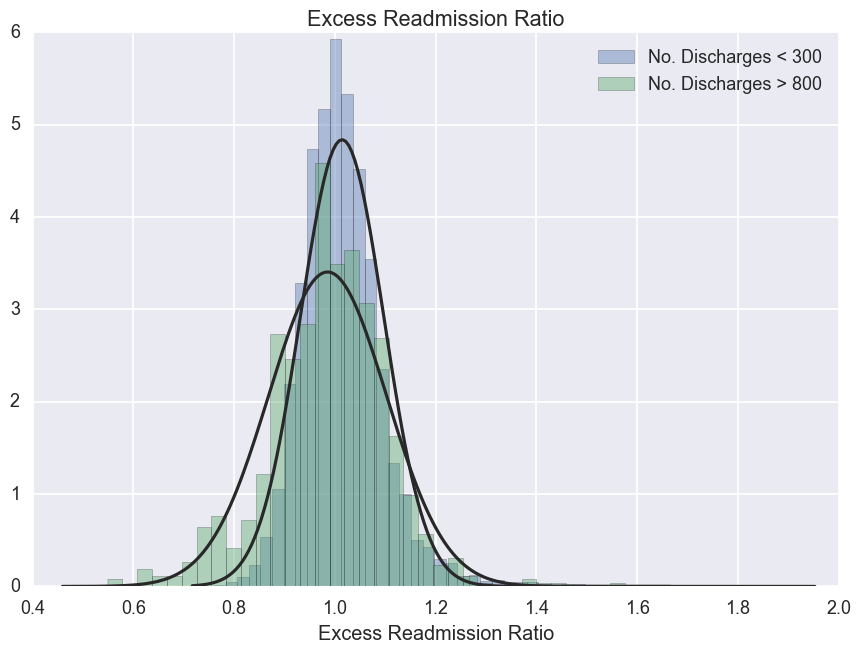

In [27]:
sns.distplot(df_lo['Excess Readmission Ratio'], fit=norm, kde=False,label='No. Discharges < 300')
sns.distplot(df_hi['Excess Readmission Ratio'], fit=norm, kde=False,label='No. Discharges > 800')
plt.legend()
plt.title('Excess Readmission Ratio');

In [28]:
mul, sigmal = norm.fit(df_lo['Excess Readmission Ratio'])
muh, sigmah = norm.fit(df_hi['Excess Readmission Ratio'])
print('lo distribution - mu: {0}, sigma: {1}'.format(mul,sigmal))
print('hi distribution - mu: {0}, sigma: {1}'.format(muh,sigmah))

lo distribution - mu: 1.0142382121807467, sigma: 0.08247145651495592
hi distribution - mu: 0.9854186874304783, sigma: 0.1171675835368727


In [29]:
from scipy.stats import ttest_ind

t,pval = ttest_ind(df_lo['Excess Readmission Ratio'], df_hi['Excess Readmission Ratio'],axis=0)
print('Test statistic: {:.3f}'.format(t))
print('P value: {:.3f}'.format(pval))

Test statistic: 9.199
P value: 0.000


#### Report statistical significance for α = .01.

The p-value is less than 0.01, so we reject the null hypothesis, and the two distributions are not equal.

#### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

While the difference in the mean of the two distributions is statistically significant, practically, the difference in a hospital with and excess readmission ratio of 0.95 and 1.05 may not be detectable.

#### Look at the scatterplot above.
        What are the advantages and disadvantages of using this plot to convey information?
        Construct another plot that conveys the same information in a more direct manner.